## Clustering with the Iris Dataset

#### Using this lesson as a guide, perform clustering on the iris dataset.

In [15]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import cm
from acquire import new_get_iris_data
from acquire import get_mall_data

import warnings
warnings.filterwarnings("ignore")

iris = new_get_iris_data()

iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


#### Choose features other than the ones used in the lesson.

In [16]:
X = iris[['petal_width', 'sepal_width']]

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [17]:
iris['cluster'] = kmeans.predict(X)

iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,cluster
0,1,1,5.1,3.5,1.4,0.2,setosa,0
1,1,2,4.9,3.0,1.4,0.2,setosa,0
2,1,3,4.7,3.2,1.3,0.2,setosa,0
3,1,4,4.6,3.1,1.5,0.2,setosa,0
4,1,5,5.0,3.6,1.4,0.2,setosa,0


#### Visualize the results of your clustering.

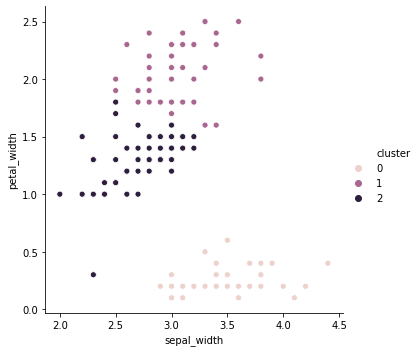

In [18]:
sns.relplot(data=iris, x='sepal_width', y='petal_width', hue='cluster')

#### Use the elbow method to visually select a good value for k.

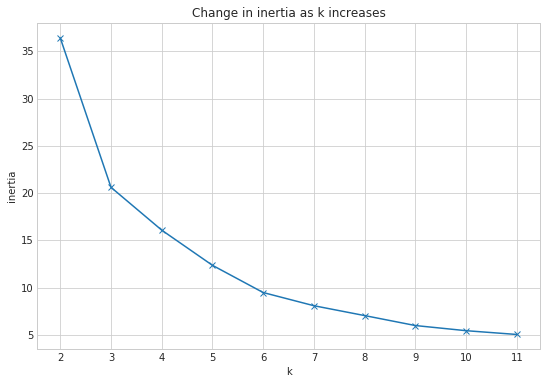

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### Repeat the clustering, this time with 3 different features.

In [20]:
X = iris[['petal_width', 'sepal_width', 'petal_length']]

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [21]:
iris['cluster'] = kmeans.predict(X)

iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,cluster
0,1,1,5.1,3.5,1.4,0.2,setosa,1
1,1,2,4.9,3.0,1.4,0.2,setosa,1
2,1,3,4.7,3.2,1.3,0.2,setosa,1
3,1,4,4.6,3.1,1.5,0.2,setosa,1
4,1,5,5.0,3.6,1.4,0.2,setosa,1


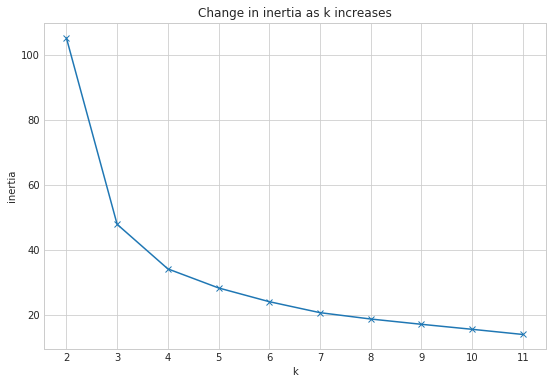

In [22]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [30]:
mall = get_mall_data()

mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
X = mall[['annual_income', 'age']]

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [33]:
mall['cluster'] = kmeans.predict(X)
mall.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


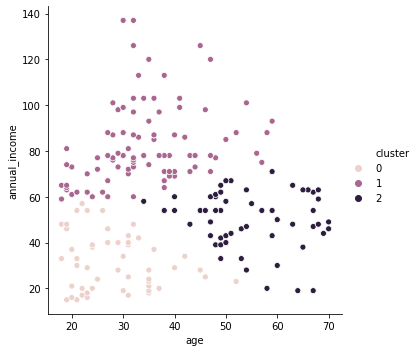

In [34]:
sns.relplot(data=mall, x='age', y='annual_income', hue='cluster')

#### How does scaling impact the results of clustering?

In [31]:
mall2 = mall.copy()

# creating scaler object
scaler = sklearn.preprocessing.MinMaxScaler()

# fitting scaler to train column and scaling after
mall2[['age', 'annual_income']] = scaler.fit_transform(mall2[['age', 'annual_income']])

mall2.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,0.019231,0.000000,39
1,2,Male,0.057692,0.000000,81
2,3,Female,0.038462,0.008197,6
3,4,Female,0.096154,0.008197,77
4,5,Female,0.250000,0.016393,40


In [35]:
X = mall2[['annual_income', 'age']]

kmeans2 = KMeans(n_clusters = 3)
kmeans2.fit(X)

kmeans2.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [36]:
mall2['cluster'] = kmeans2.predict(X)

mall2.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,0.019231,0.000000,39,0
1,2,Male,0.057692,0.000000,81,0
2,3,Female,0.038462,0.008197,6,0
3,4,Female,0.096154,0.008197,77,0
4,5,Female,0.250000,0.016393,40,0


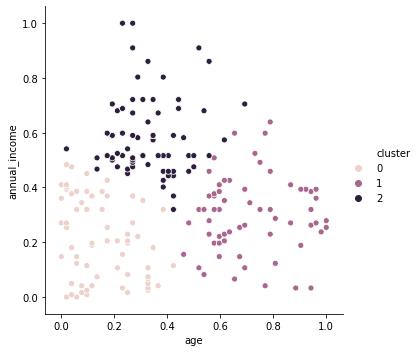

In [37]:
sns.relplot(data = mall2, x='age', y='annual_income', hue='cluster')

#### Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

__UNSCALED__

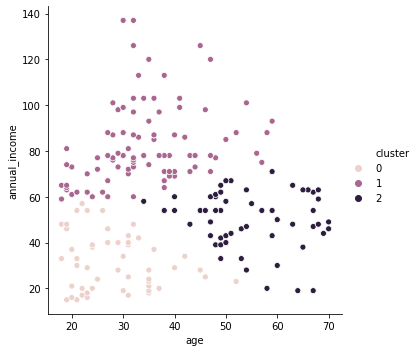

In [39]:
sns.relplot(data=mall, x='age', y='annual_income', hue='cluster')

__SCALED__

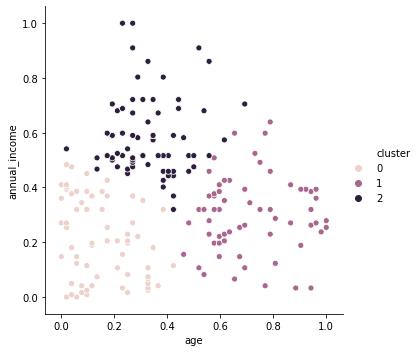

In [41]:
sns.relplot(data = mall2, x='age', y='annual_income', hue='cluster')

CLUSTER 0
- Annual income not much different
- Unscaled points come closer to max age
- Scaled only meet halfway mark of age

CLUSTER 1
- Annual income not much different
- Unscaled data has several points at min age 
- Scaled data point only has one point at min age

CLUSTER 2
- Scaled has a few points in annual income that are higher than the max annual income of unscaled
- Not much difference in age